> # 퍼셉트론

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

# a, b, c에 따라 판정식을 표시하는 함수
def plot_boundary(a, b, c=0):
  x = np.arange(-1.0, 1.1, 0.1)
  y = eval('%f*x' % (-a / (b + 1e-6))) #### b가 0일 경우를 대비해서 1e-6을 추가
  plt.plot(x, y)
  print('a: {}, b: {}, c:{}'.format(a, b, c))
  
# scatter plot 함수 (개인 버전)
def plot_scatter():
  sns.lmplot('x0', 'x1', hue = 'y', data = dataset, fit_reg= False)
  plt.ylim(-1, 1)
  plt.xlim(-1,1)

___
> ## 퍼셉트론의 학습규칙

- 퍼셉트론이란 2-클래스 선형 식별함수를 구하는 고전적인 방법 중 하나
- 이전 챕터의 회전 방식과 유사하나, 회전 각도를 잘못된 크기만큼 변경한다는 점에서 차이가 있음
- 퍼셉트론에서는 레이블을 1과 -1로 바꿔서 작업

In [2]:
def predict(x0, x1):
  if a*x0 + b*x1 + c > 0.0 :
    y = 1  # 0 -> 1
  else:
    y = -1 # 1 -> -1
  return y

In [16]:
a = 0.0
b = 1.0
c = 0.0
lr = 1.0

def train(dataset, epochs=1):
  global a, b, c
  for i, (x0, x1, y) in dataset.iterrows():
    if y * (a*x0 + b*x1 + c) > 0.0:
      pass
    else:
      a += lr * y * x0
      b += lr * y * x1
      
  return a, b

- 레이블이 1과 -1로 나뉘기 때문에 판정식에 레이블을 곱하여 오분류 여부를 파악하기가 과거에 비해 간단해짐 (`predict` 불필요)
- 샘플 데이터는 다음과 같음

In [10]:
dataset = pd.DataFrame({'x0':[0.4, -0.2, 0.3, -0.4, -0.2, -0.5],
                        'x1': [0.4, 0.3, -0.1, -0.4, -0.3, 0.2],
                        'y': [1, 1, 1, -1, -1, -1]})
dataset

,x0,x1,y
0,0.4,0.4,1
1,-0.2,0.3,1
2,0.3,-0.1,1
3,-0.4,-0.4,-1
4,-0.2,-0.3,-1
5,-0.5,0.2,-1


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


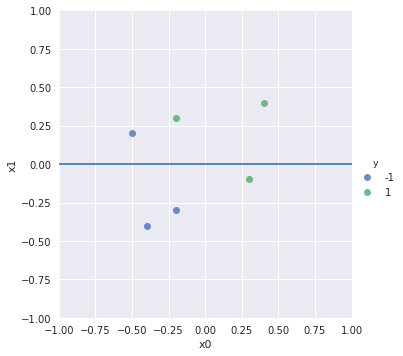

In [11]:
plot_scatter()
plot_boundary(a=a, b=b, c=c)

- 위에서 정의한 `train(epochs = 1)` 실행 시 2번 수정을 시행하며 결과 값은 다음과 같음

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


a: 0.8, b: 0.7, c:0.0


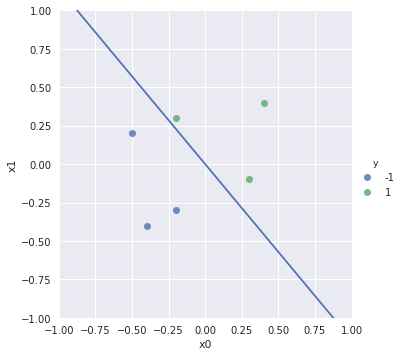

In [17]:
train(dataset)
plot_scatter()
plot_boundary(a=a,b=b,c=c)

___
> ## 판정식을 벡터로 나타내기

- 그동안은 가중치가 2개인 2차원이었으나 여기에 x2를 추가하면 식별함수는 다음과 같은 3차원 형태를 띄게 됨  
   $y * (a*x0 + b+x1 + C*x2 + d) >0$
   
   
- 여기에서 변수 `[a, b, C]`는 데이터 `[x0, x1, x2]`에 대한 가중치(weight)며, 절편 `[d]`는 편향(bias)로 지칭
- 위 식을 다시 정리하면 다음과 같이 표기할 수 있음:  
    $ y * (w0*x0 + w1+x1 + w2*x2 + b) >0$
      

- 위 식은 벡터의 내적 형식이며, NumPy를 사용하면 쉽게 연산 가능

In [18]:
w = np.array([1, 2, 3])
x = np.array([4, 5, 6])
np.dot(w,x)    # 1*4 + 2*5 + 3*6 = 32

32

- 위 연산법을 사용하면 차원이 높아져도 동일한 판정식으로 식별 가능  
```python
w = np.array([w0, w1, w2])
x = np.array([x0, x1, x2])
if y * (np.dot(w,x)+b) >0:
    ...
```
- 편향도 `wb`, 가중치 1로 식에 포함시킨다면 다음과 같이 표기 가능:  
```python
w = np.array([wb, w0, w1, w2])
x = np.array([1.0, x0, x1, x2])
if y * np.dot(w,x) >0:
    ...
```

In [ ]:
def train(dataset, epochs=1):
  lr = 1.0
  w = np.array([0.0, 0.0, 1.0])
  for epoch in range(epochs):
    for i, (x0, x1, y) in dataset.iterrows():
      x = np.array([1.0, x0, x1])
      if y * np.dot(w, x) > 0.0:
        pass
      else:
        w += lr * y * x    # w와 x 는 np.array이므로 주의 필요
      
  return w